#--- 0. Setup and Data Loading ---

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 

Set Styles

In [2]:
# Set plot style
sns.set_style("whitegrid")

# Define file paths
raw_data_path = 'data/raw/benin-malanville.csv'
cleaned_data_output_path = 'data/cleaned/benin_clean.csv'

Load DataSet

In [3]:
try:
    df = pd.read_csv(raw_data_path , parse_dates=["Timestamp"])
    print("Dataset loaded successfully.")
    print("First few rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: {raw_data_path} not found. Please ensure the data file is in the correct directory.")
    exit()

Dataset loaded successfully.
First few rows of the dataset:
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1   

more information about the data frame

In [4]:

df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [5]:
#✅ 1. Summary Statistics for Numeric Columns
numeric_summary = df.describe()
print(numeric_summary)


                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000    

Count Missing Values in Each Column

In [6]:
missing_counts = df.isna().sum()
print(missing_counts)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


List Columns with >5% Missing Values

In [7]:
missing_percent = (missing_counts / len(df)) * 100
high_missing = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(high_missing)


Columns with >5% missing values:
Comments    100.0
dtype: float64


# Outlier Detection & Basic Cleaning

Check for Missing Values in Key Columns

In [8]:
print(df.isna().sum())
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing = df[columns_to_check].isna().sum()
print("Missing values:\n", missing)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing values:
 GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


Detect Outliers Using Z-score


In [9]:
from scipy.stats import zscore

z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)
outlier_counts = outliers.sum()
print("Outlier counts:\n", outlier_counts)


Outlier counts:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


 Z-scores & Flag Rows with |Z| > 3


In [10]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore)
outlier_mask = (np.abs(z_scores) > 3).any(axis=1)
print(f"Outliers flagged: {outlier_mask.sum()}")


Outliers flagged: 7740


drop outliers

In [11]:
df_cleaned = df[~outlier_mask].copy()


impute

In [12]:
for col in cols:
    median_value = df_cleaned[col].median()
    df_cleaned[col].fillna(median_value, inplace=True)
df_cleaned.to_csv(cleaned_data_output_path, index=False)
print(f"Cleaned data exported to {cleaned_data_output_path}")


Cleaned data exported to data/cleaned/benin_clean.csv


# Time Series Analysis


Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.

In [13]:
#load the cleaned data
try:
    df = pd.read_csv(cleaned_data_output_path , parse_dates=["Timestamp"])
    print("Dataset loaded successfully.")
    print("First few rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: {cleaned_data_output_path} not found. Please ensure the data file is in the correct directory.")
    exit()

Dataset loaded successfully.
First few rows of the dataset:
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1 2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2 2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3 2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4 2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1   

In [14]:

# Ensure Timestamp column is parsed correctly
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
# Check for any parsing errors
if df['Timestamp'].isnull().any():
    print("Warning: Some timestamps could not be parsed. Check the data format.")
df.set_index('Timestamp', inplace=True)


 Line Chart for Irradiance and Temperature

/tmp/ipykernel_13441/1520609403.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/hamid/Desktop/kaim5/solar-challenge-week1/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


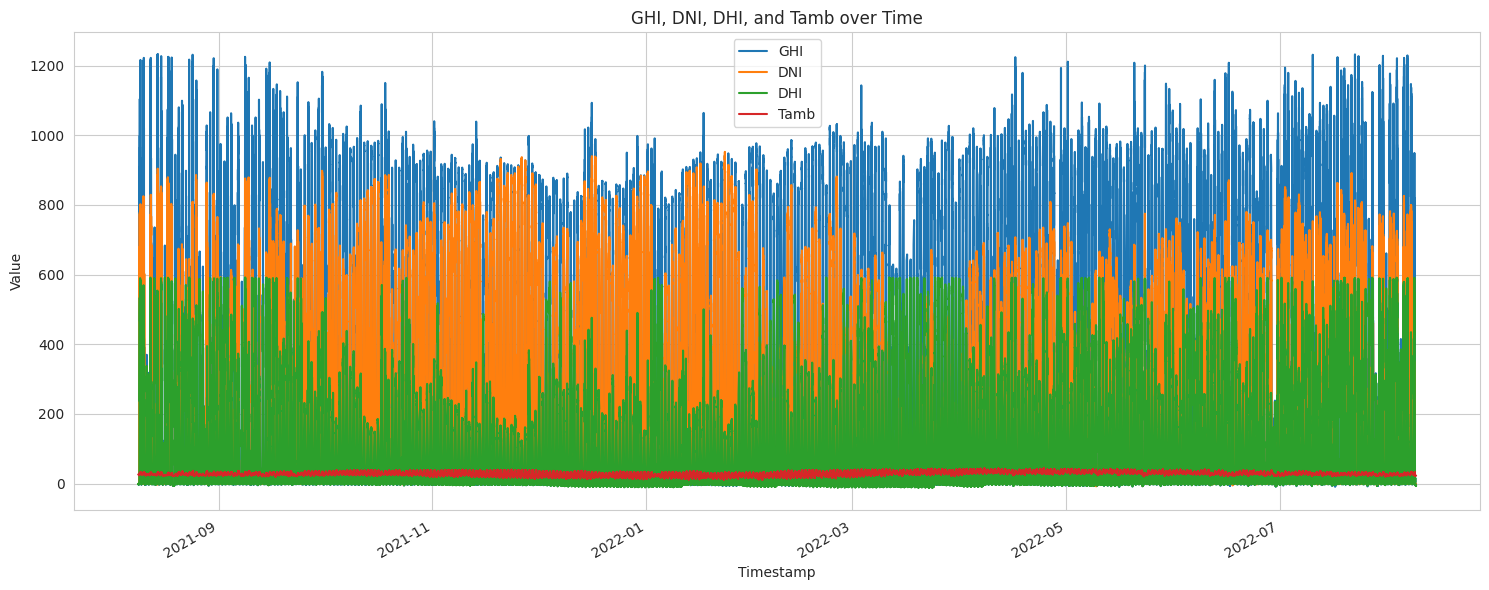

In [24]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 6))
plt.title('GHI, DNI, DHI, and Tamb over Time')
plt.ylabel('Value')
plt.xlabel('Timestamp')
plt.legend()
plt.tight_layout()
plt.show()


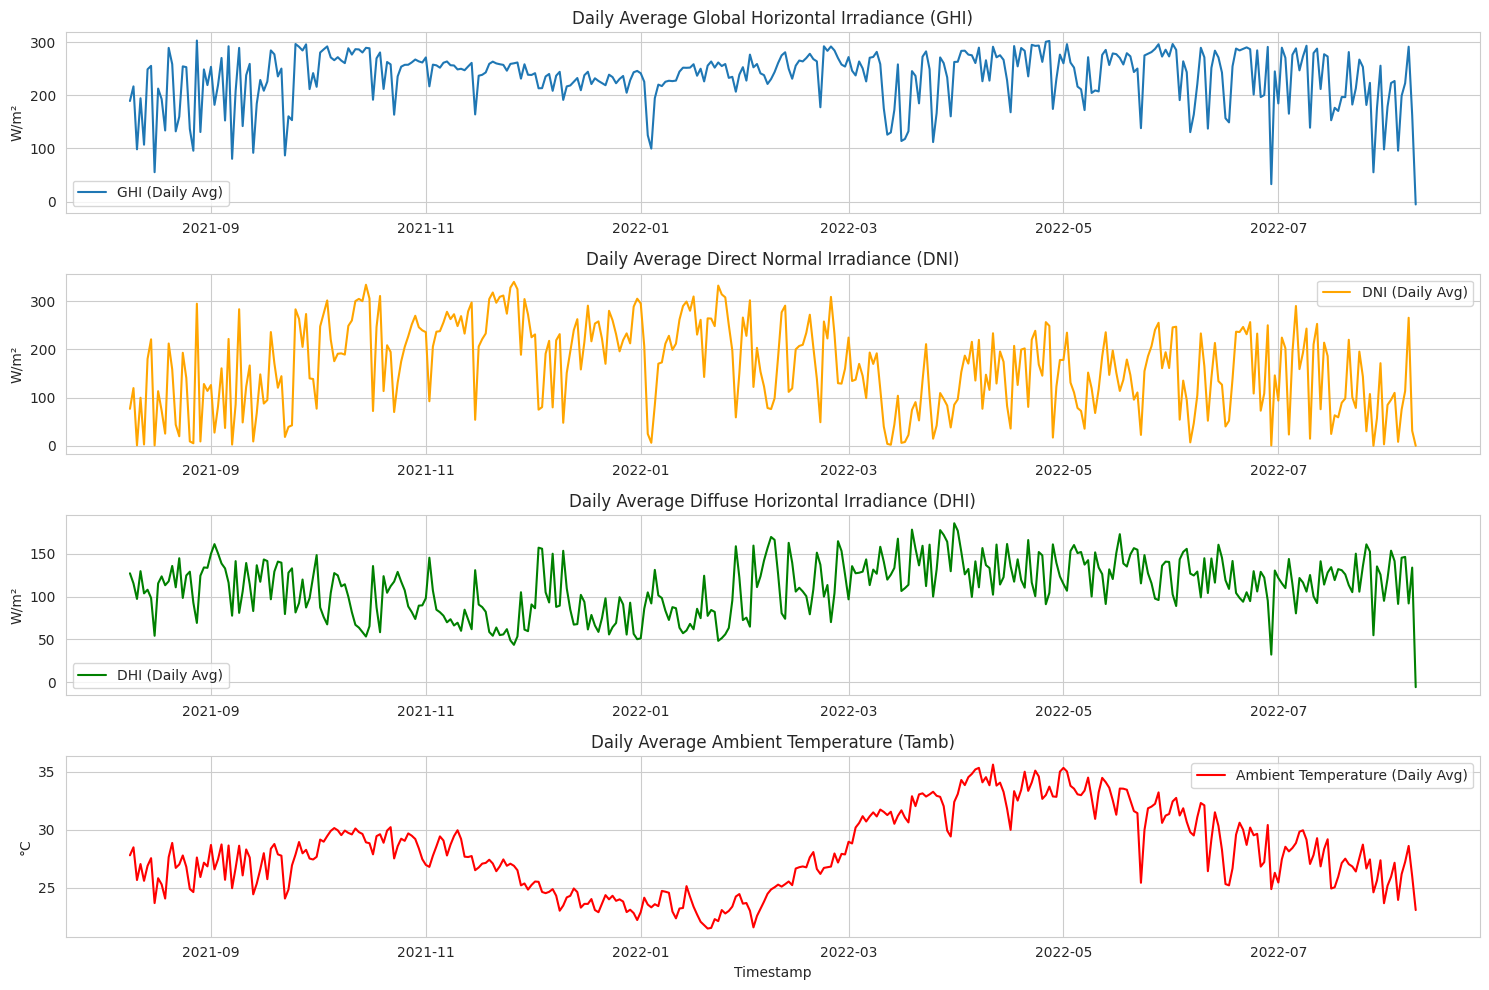

In [16]:
df_daily_avg = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(df_daily_avg['GHI'], label='GHI (Daily Avg)')
plt.title('Daily Average Global Horizontal Irradiance (GHI)')
plt.ylabel('W/m²')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df_daily_avg['DNI'], label='DNI (Daily Avg)', color='orange')
plt.title('Daily Average Direct Normal Irradiance (DNI)')
plt.ylabel('W/m²')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df_daily_avg['DHI'], label='DHI (Daily Avg)', color='green')
plt.title('Daily Average Diffuse Horizontal Irradiance (DHI)')
plt.ylabel('W/m²')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df_daily_avg['Tamb'], label='Ambient Temperature (Daily Avg)', color='red')
plt.title('Daily Average Ambient Temperature (Tamb)')
plt.ylabel('°C')
plt.xlabel('Timestamp')
plt.legend()
plt.tight_layout()
plt.show()

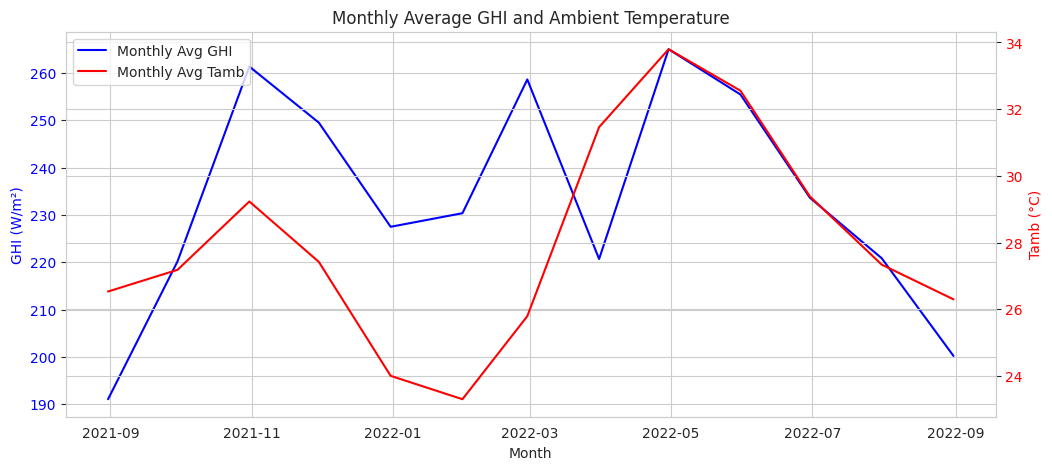

In [17]:
# Observe patterns by month (e.g., monthly average)
# Corrected to use 'ME' as per previous warning
df_monthly_avg = df[['GHI', 'Tamb']].resample('ME').mean()

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot GHI on the primary y-axis
ax1.plot(df_monthly_avg.index, df_monthly_avg['GHI'], label='Monthly Avg GHI', color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('GHI (W/m²)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Tamb on the secondary y-axis
ax2.plot(df_monthly_avg.index, df_monthly_avg['Tamb'], label='Monthly Avg Tamb', color='red')
ax2.set_ylabel('Tamb (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Average GHI and Ambient Temperature')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [22]:
# Observe patterns throughout the day (e.g., average hourly profile)
df_clean['Hour'] = df.index.hour
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
plt.figure(figsize=(12, 6))
hourly_avg.plot(ax=plt.gca())
plt.title('Average Hourly Profile of Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.xticks(range(24))
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
df_clean.drop(columns=['Hour'], inplace=True) # Clean up temporary column

NameError: name 'df_clean' is not defined

#--- 1. Data Understanding and Initial Preprocessing ---

In [ ]:


# Convert 'Timestamp' to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M', errors='coerce')

# Set 'Timestamp' as the index
df = df.set_index('Timestamp')

# Sort by index to ensure time series integrity
df = df.sort_index()

print("\n--- Data Info (before cleaning) ---")
df.info()



--- Data Info (before cleaning) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TMo

In [ ]:
 #--- 2. Summary Statistics & Missing-Value Report ---

print("\n--- Summary Statistics for Numeric Columns ---")
print(df.describe())

print("\n--- Missing Values Count ---")
missing_values = df.isna().sum()
print(missing_values)

print("\n--- Columns with >5% Nulls ---")
total_rows = len(df)
for col, count in missing_values.items():
    if count / total_rows > 0.05:
        print(f"- {col}: {count} missing values ({count/total_rows:.2%})")


--- Summary Statistics for Numeric Columns ---
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000    

In [ ]:
# --- 3. Outlier Detection & Basic Cleaning ---

# Columns for Z-score based outlier detection
zscore_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Apply Z-score method. We'll work on a copy to apply changes
df_clean = df.copy()

print(f"\n--- Outlier Detection for {zscore_cols} ---")
outlier_rows_count = 0
for col in zscore_cols:
    if col in df_clean.columns and df_clean[col].dtype in ['float64', 'int64']:
        # Calculate Z-scores, ignoring NaNs for calculation
        df_clean[f'{col}_zscore'] = np.abs(zscore(df_clean[col].dropna()))
        # Identify rows where Z-score > 3
        outliers = df_clean[df_clean[f'{col}_zscore'] > 3]
        if not outliers.empty:
            print(f"Column '{col}': {len(outliers)} potential outliers identified.")
            # For demonstration, we'll mark these values as NaN and then impute/drop
            # In a real scenario, you might investigate these rows further.
            df_clean.loc[df_clean[f'{col}_zscore'] > 3, col] = np.nan
            outlier_rows_count += len(outliers)
        # Drop the temporary zscore column
        df_clean = df_clean.drop(columns=[f'{col}_zscore'])
    else:
        print(f"Warning: Column '{col}' not found or not numeric, skipping Z-score.")

print(f"Total potential outlier values marked as NaN across selected columns: {outlier_rows_count}")


--- Outlier Detection for ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'] ---
Column 'GHI': 89 potential outliers identified.
Column 'DHI': 3738 potential outliers identified.
Column 'ModA': 27 potential outliers identified.
Column 'ModB': 63 potential outliers identified.
Column 'WS': 3109 potential outliers identified.
Column 'WSgust': 3500 potential outliers identified.
Total potential outlier values marked as NaN across selected columns: 10526


In [ ]:
# Handle missing values: Impute median for key numerical columns
# For 'Cleaning' (1 or 0), it's a flag, missing values might mean 'not cleaned'. Let's fill with 0 if sensible.
# For 'Comments', drop if too many missing, or leave as is if not used in numerical analysis.
print("\n--- Handling Missing Values ---")
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD', 'BP', 'TModA', 'TModB', 'Precipitation']:
    if col in df_clean.columns:
        if df_clean[col].isna().sum() > 0:
            original_nan_count = df_clean[col].isna().sum()
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"Imputed {original_nan_count} missing values in '{col}' with median ({median_val:.2f}).")

# For 'Cleaning' column, fill missing values with 0 (assuming NaN means no cleaning event)
if 'Cleaning' in df_clean.columns:
    original_clean_nan_count = df_clean['Cleaning'].isna().sum()
    df_clean['Cleaning'].fillna(0, inplace=True)
    if original_clean_nan_count > 0:
        print(f"Filled {original_clean_nan_count} missing values in 'Cleaning' with 0.")

# For 'Comments', if it exists and has NaNs, we can fill with an empty string or 'No Comment'
if 'Comments' in df_clean.columns:
    df_clean['Comments'].fillna('No Comment', inplace=True)

print("\n--- Missing Values after Cleaning ---")
print(df_clean.isna().sum())
print(f"Cleaned DataFrame shape: {df_clean.shape}")


--- Handling Missing Values ---
Imputed 89 missing values in 'GHI' with median (1.80).
Imputed 3738 missing values in 'DHI' with median (0.50).
Imputed 27 missing values in 'ModA' with median (4.50).
Imputed 63 missing values in 'ModB' with median (4.30).


/tmp/ipykernel_29794/3969928970.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
/tmp/ipykernel_29794/3969928970.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Imputed 3109 missing values in 'WS' with median (1.90).
Imputed 3500 missing values in 'WSgust' with median (2.40).

--- Missing Values after Cleaning ---


/tmp/ipykernel_29794/3969928970.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
/tmp/ipykernel_29794/3969928970.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Comments         0
dtype: int64
Cleaned DataFrame shape: (525600, 18)


In [ ]:
# Export cleaned DataFrame
try:
    df_clean.to_csv(cleaned_data_output_path)
    print(f"\nCleaned data exported to {cleaned_data_output_path}")
except Exception as e:
    print(f"Error exporting cleaned data: {e}")


Cleaned data exported to data/cleaned/benin_clean.csv



--- Time Series Analysis ---


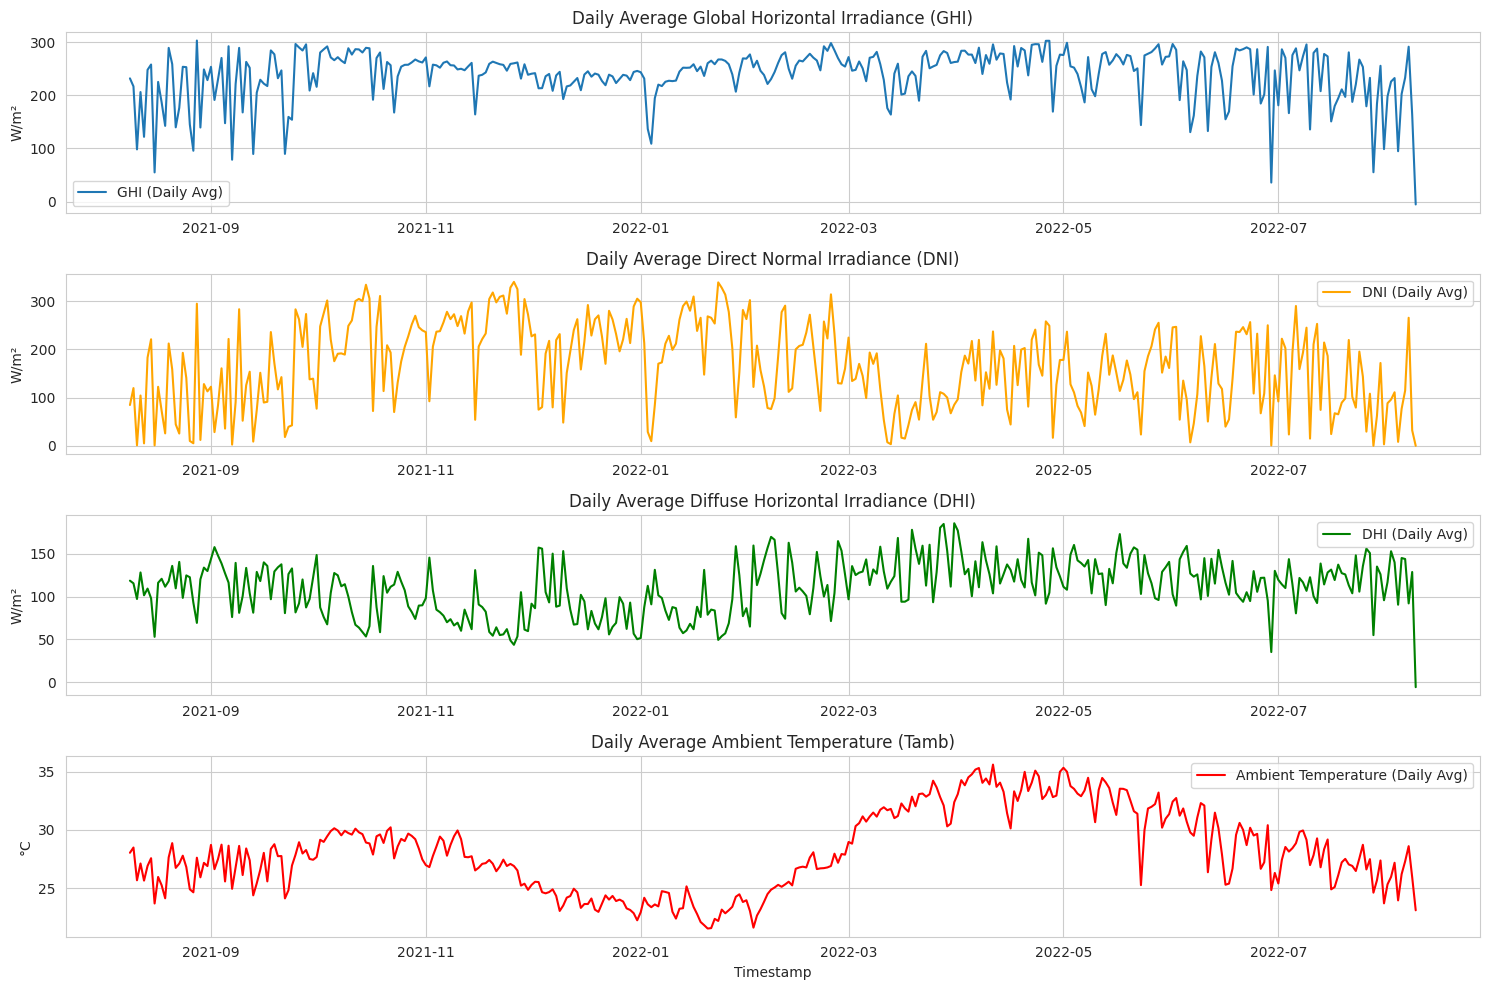

In [ ]:
#--- 4. Time Series Analysis ---
print("\n--- Time Series Analysis ---")

# Resample to daily average for clearer trends (optional, can also plot raw)
df_daily_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
plt.plot(df_daily_avg['GHI'], label='GHI (Daily Avg)')
plt.title('Daily Average Global Horizontal Irradiance (GHI)')
plt.ylabel('W/m²')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df_daily_avg['DNI'], label='DNI (Daily Avg)', color='orange')
plt.title('Daily Average Direct Normal Irradiance (DNI)')
plt.ylabel('W/m²')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df_daily_avg['DHI'], label='DHI (Daily Avg)', color='green')
plt.title('Daily Average Diffuse Horizontal Irradiance (DHI)')
plt.ylabel('W/m²')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df_daily_avg['Tamb'], label='Ambient Temperature (Daily Avg)', color='red')
plt.title('Daily Average Ambient Temperature (Tamb)')
plt.ylabel('°C')
plt.xlabel('Timestamp')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_29794/3501767529.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df_clean[['GHI', 'Tamb']].resample('M').mean()


AttributeError: Line2D.set() got an unexpected keyword argument 'secondary_y'

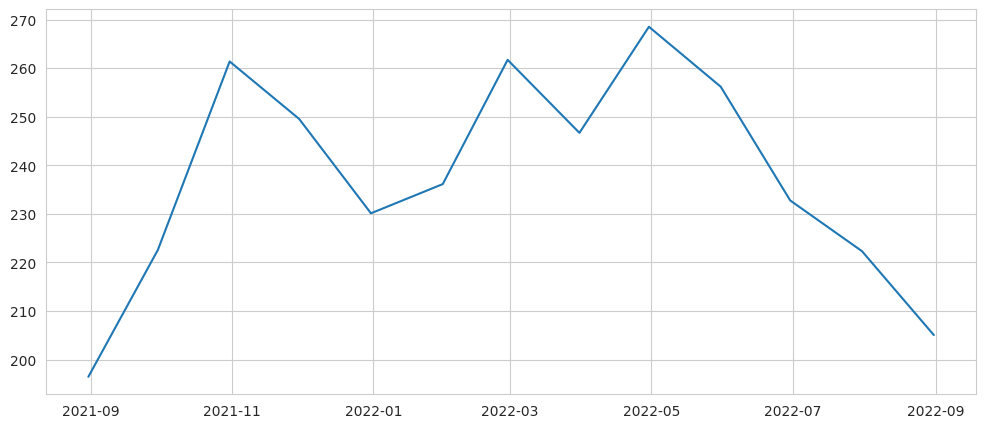

In [ ]:
# Observe patterns by month (e.g., monthly average)
df_monthly_avg = df_clean[['GHI', 'Tamb']].resample('M').mean()
plt.figure(figsize=(12, 5))
plt.plot(df_monthly_avg['GHI'], label='Monthly Avg GHI')
plt.plot(df_monthly_avg['Tamb'], label='Monthly Avg Tamb', secondary_y=True, color='red')
plt.title('Monthly Average GHI and Ambient Temperature')
plt.ylabel('GHI (W/m²)')
plt.right_ax.set_ylabel('Tamb (°C)') # For secondary_y axis
plt.legend(loc='upper left')
plt.show()

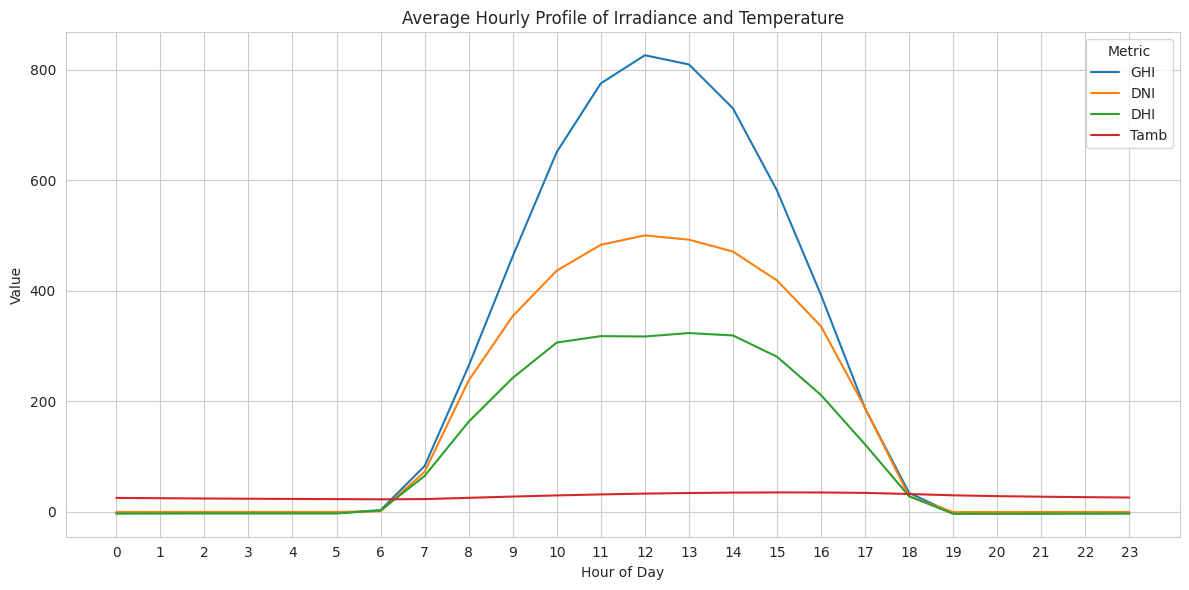

In [ ]:
# Observe patterns throughout the day (e.g., average hourly profile)
df_clean['Hour'] = df_clean.index.hour
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
plt.figure(figsize=(12, 6))
hourly_avg.plot(ax=plt.gca())
plt.title('Average Hourly Profile of Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.xticks(range(24))
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
df_clean.drop(columns=['Hour'], inplace=True) # Clean up temporary column


--- Cleaning Impact Analysis ---

Average ModA & ModB grouped by Cleaning (0=No Cleaning, 1=Cleaning):
                ModA        ModB
Cleaning                        
0         236.459225  228.669520
1         307.229278  301.972165


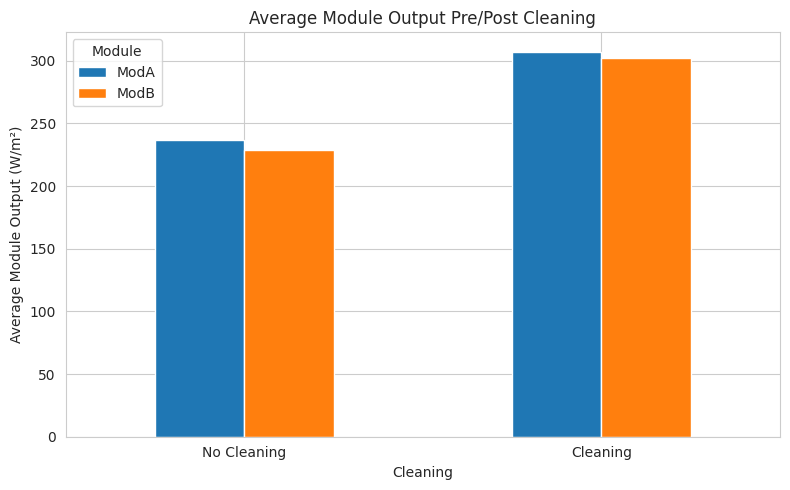

In [ ]:
# --- 5. Cleaning Impact ---
print("\n--- Cleaning Impact Analysis ---")

# Ensure 'Cleaning' column is numeric (0 or 1)
df_clean['Cleaning'] = df_clean['Cleaning'].astype(int)

# Group by 'Cleaning' flag and calculate average ModA & ModB
cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

print("\nAverage ModA & ModB grouped by Cleaning (0=No Cleaning, 1=Cleaning):")
print(cleaning_impact)

cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average Module Output Pre/Post Cleaning')
plt.ylabel('Average Module Output (W/m²)')
plt.xticks(ticks=[0, 1], labels=['No Cleaning', 'Cleaning'], rotation=0)
plt.legend(title='Module')
plt.tight_layout()
plt.show()


--- Correlation Analysis ---


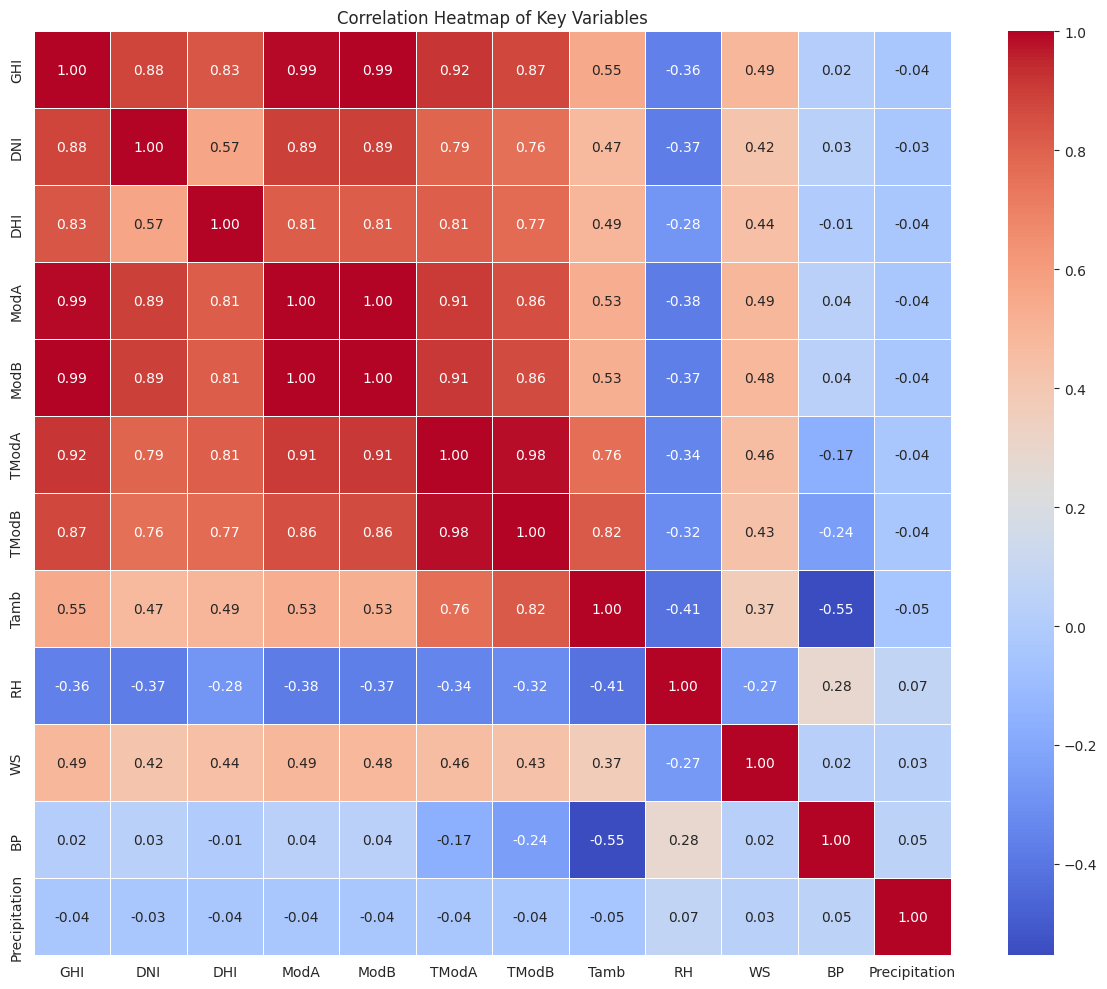


--- Scatter Plots for Relationships ---


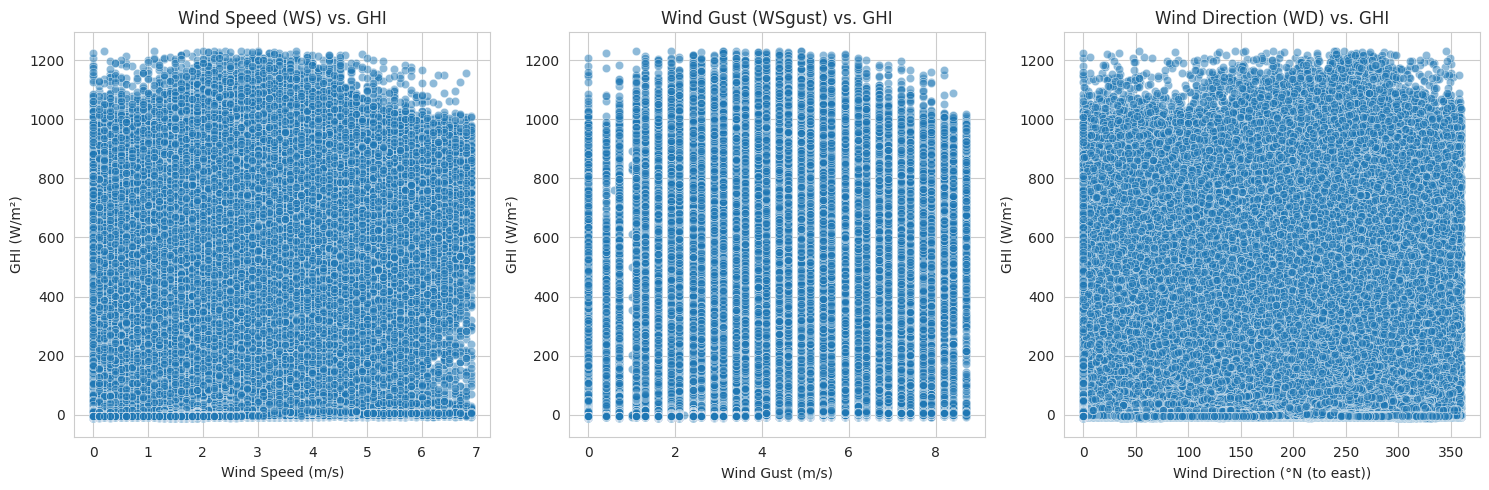

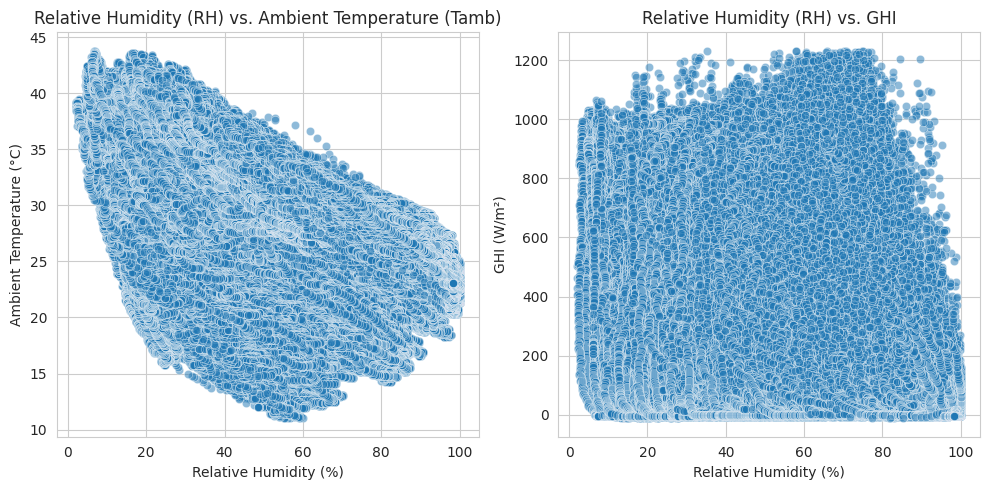

In [ ]:
# --- 6. Correlation & Relationship Analysis ---
print("\n--- Correlation Analysis ---")

# Select relevant columns for heatmap
correlation_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP', 'Precipitation']
correlation_matrix = df_clean[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()

print("\n--- Scatter Plots for Relationships ---")

# WS, WSgust, WD vs. GHI
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df_clean, alpha=0.5)
plt.title('Wind Speed (WS) vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')

plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df_clean, alpha=0.5)
plt.title('Wind Gust (WSgust) vs. GHI')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('GHI (W/m²)')

plt.subplot(1, 3, 3)
# Wind Direction (WD) vs. GHI might be more complex, maybe boxplot for bins or scatter if numerical
# For now, a scatter plot might show trends, but a circular plot (wind rose) is better for WD
sns.scatterplot(x='WD', y='GHI', data=df_clean, alpha=0.5)
plt.title('Wind Direction (WD) vs. GHI')
plt.xlabel('Wind Direction (°N (to east))')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

# RH vs. Tamb or RH vs. GHI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.5)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.5)
plt.title('Relative Humidity (RH) vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()



--- Wind and Distribution Analysis ---


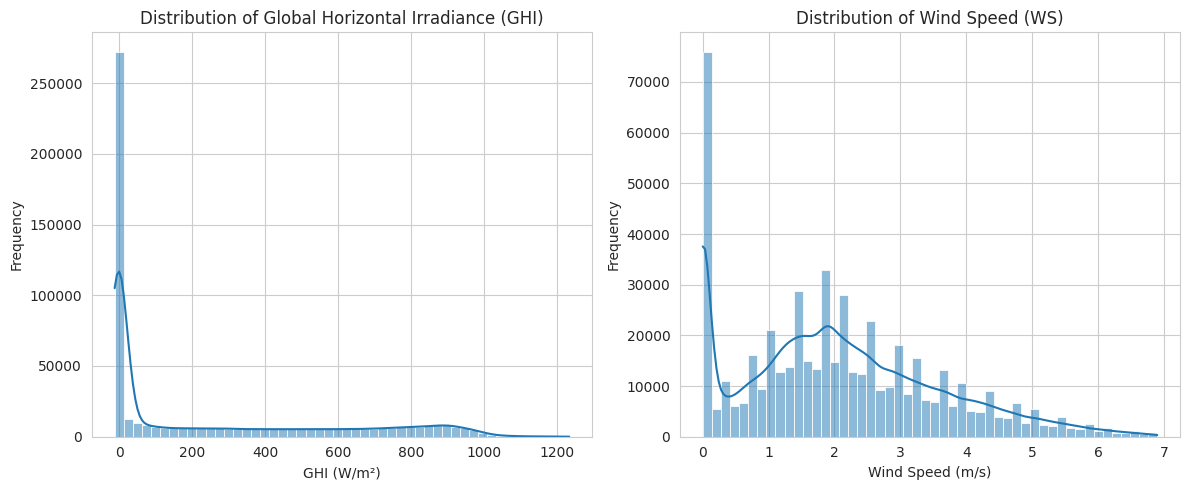

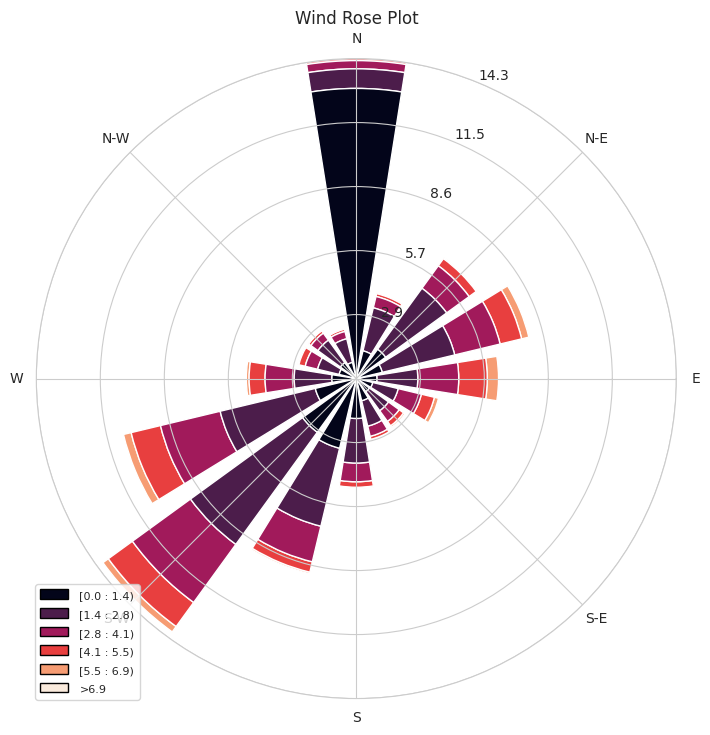


Note: A Wind Rose plot for WS/WD would provide better insights into wind patterns.
It typically requires a specialized library like 'windrose'. Histograms for WS are shown instead.


In [ ]:
# --- 7. Wind & Distribution Analysis ---
print("\n--- Wind and Distribution Analysis ---")

# Histograms for GHI and WS
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], kde=True, bins=50)
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], kde=True, bins=50)
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Wind Rose Plot (Conceptual - requires 'windrose' library for full implementation)
# A wind rose visualizes wind speed and direction data.
# If you install `pip install windrose`, you could do:
from windrose import WindroseAxes
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot')
plt.show()
print("\nNote: A Wind Rose plot for WS/WD would provide better insights into wind patterns.")
print("It typically requires a specialized library like 'windrose'. Histograms for WS are shown instead.")



--- Temperature and Humidity Analysis ---


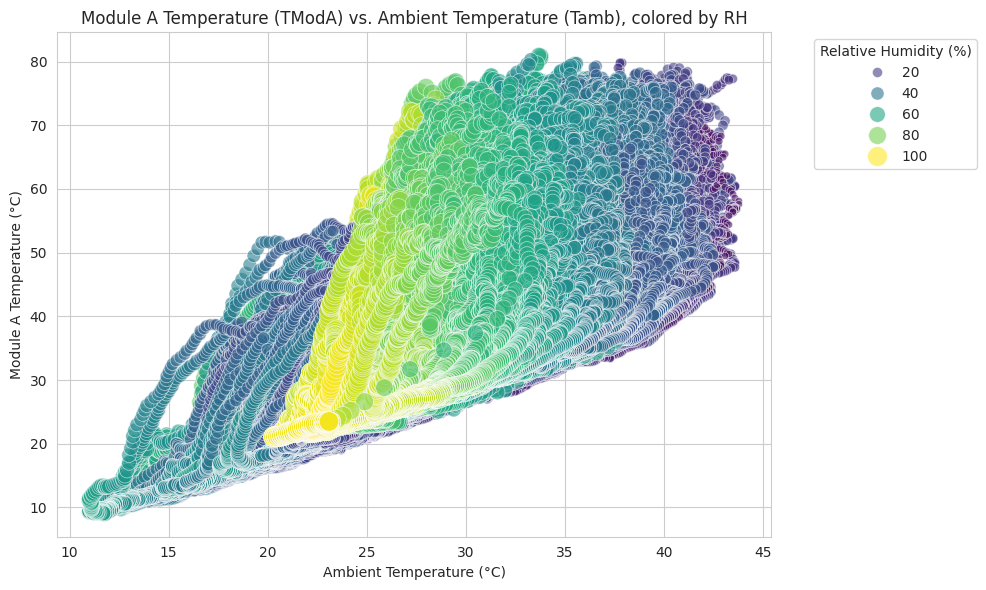

In [ ]:
# --- 8. Temperature Analysis ---
print("\n--- Temperature and Humidity Analysis ---")

# Examine how relative humidity (RH) might influence temperature readings and solar radiation.
# We already did scatter plots of RH vs Tamb and RH vs GHI above.
# Let's add a plot of TModA vs Tamb, colored by RH for additional insight.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tamb', y='TModA', hue='RH', size='RH', sizes=(20, 200),
                alpha=0.6, data=df_clean, palette='viridis')
plt.title('Module A Temperature (TModA) vs. Ambient Temperature (Tamb), colored by RH')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Module A Temperature (°C)')
plt.legend(title='Relative Humidity (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



--- Bubble Chart: GHI vs. Tamb with bubble size = RH ---


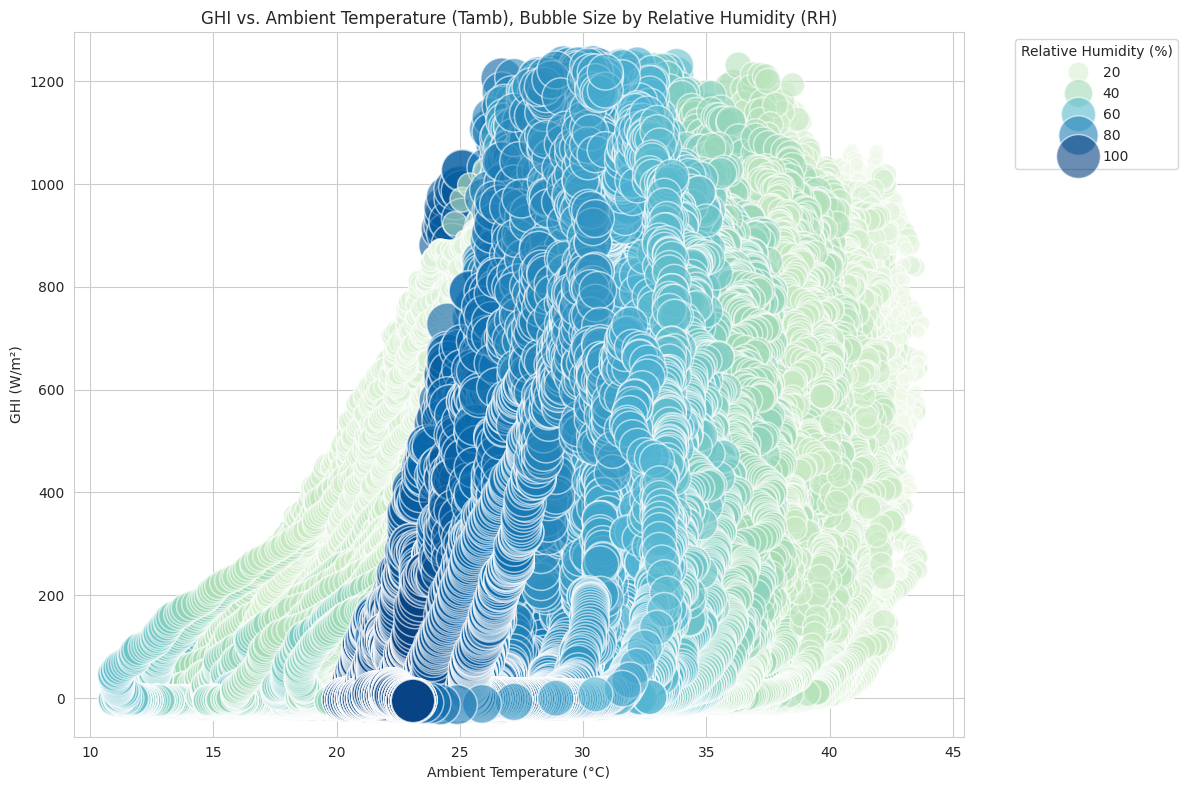


--- EDA for Benin Complete ---
This notebook provides a template. Repeat similar steps for Sierra Leone and Togo.


In [ ]:
# --- 9. Bubble Chart ---
print("\n--- Bubble Chart: GHI vs. Tamb with bubble size = RH ---")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Tamb', y='GHI', size='RH', sizes=(50, 1000), hue='RH',
                alpha=0.6, data=df_clean, palette='GnBu')
plt.title('GHI vs. Ambient Temperature (Tamb), Bubble Size by Relative Humidity (RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.legend(title='Relative Humidity (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n--- EDA for Benin Complete ---")